In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

%matplotlib inline

In [2]:
!tree

.
├── 1-Data-exploration.ipynb
├── 2-Learning.ipynb
├── data_processing.py
├── dengue_features_test.csv
├── dengue_features_train.csv
├── dengue_labels_train.csv
├── Iquitos-plaza.jpg
├── optimizationOfModels.py
├── __pycache__
│   ├── data_processing.cpython-36.pyc
│   └── optimizationOfModels.cpython-36.pyc
├── README.md
├── SanJuan-ElasticNet_Iquitos-RandomForest.csv
├── San_Juan-Puerto_Rico.JPG
└── submission_format.csv

1 directory, 14 files


# 1. Data import and processing 

In [3]:
# load the provided data
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')

In [4]:
from data_processing import preprocess_data,split_time_series

lag_step_for_SanJuan = 15
lag_step_for_Iquitos = 20

sj_train, iq_train = preprocess_data('dengue_features_train.csv',
                                    labels_path="dengue_labels_train.csv",
                                    lag_step_for_SanJuan = lag_step_for_SanJuan,
                                    lag_step_for_Iquitos = lag_step_for_Iquitos)

/home/louis/Documents/Doctorat/OnlineDatasets/dengue-drivendata/data_processing.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe[column + "_time - " + str(lag)] = dataframe[column].shift(lag)  # copy the previous value
/home/louis/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


# 2. Training 

In [5]:
sj_features  = sj_train.drop('total_cases', axis =1)
sj_targets = sj_train['total_cases']

iq_features  = iq_train.drop('total_cases', axis =1)
iq_targets = iq_train['total_cases']

test_set_ratio = 0.3 

X_sj_train, X_sj_test, y_sj_train, y_sj_test = split_time_series(sj_features, sj_targets, test_set_ratio)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = split_time_series(iq_features, iq_targets, test_set_ratio)


## 2.1 Optimization of parameters for San Juan

In [6]:
from optimizationOfModels import find_best_params_ElasticNet, find_best_params_RandomForest

In [8]:
parameters1_SanJuan = [10,20,50,100,200,400,800,1000]
parameters2_SanJuan = [5,10,15,20,40]

param1_sj, param2_sj, scores__mean_absulute_error_sj = find_best_params_RandomForest(X_sj_train,
                                                                                 y_sj_train,
                                                                                 X_sj_test,
                                                                                 y_sj_test,
                                                                                 parameters1_SanJuan,
                                                                                 parameters2_SanJuan)

mean_absolute_error [alpha,l1_ratio]: mae
mean_absolute_error [10,5]: 25.047097704594794
mean_absolute_error [10,10]: 27.264389355997668
mean_absolute_error [10,15]: 27.291217182396352
mean_absolute_error [10,20]: 29.371530249110318
mean_absolute_error [10,40]: 29.282206405693948
mean_absolute_error [20,5]: 25.097079805852353
mean_absolute_error [20,10]: 26.70679513711088
mean_absolute_error [20,15]: 27.070451902543024
mean_absolute_error [20,20]: 27.830562616505674
mean_absolute_error [20,40]: 27.737722419928822
mean_absolute_error [50,5]: 26.211854551031248
mean_absolute_error [50,10]: 27.94180141345645
mean_absolute_error [50,15]: 28.93214460348487
mean_absolute_error [50,20]: 28.88969748507952
mean_absolute_error [50,40]: 28.93131672597865
mean_absolute_error [100,5]: 26.305222426333046
mean_absolute_error [100,10]: 28.140280830909244
mean_absolute_error [100,15]: 29.106690166937664
mean_absolute_error [100,20]: 29.150169295742174
mean_absolute_error [100,40]: 29.03601423487545
mea

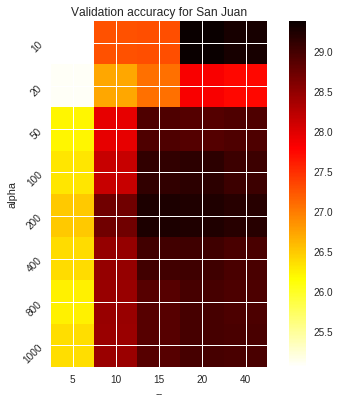

In [9]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores__mean_absulute_error_sj, interpolation='nearest', cmap=plt.cm.hot_r)
plt.ylabel('alpha')
plt.xlabel('--')
plt.colorbar()
plt.yticks(np.arange(len(parameters1_SanJuan)), parameters1_SanJuan, rotation=45)
plt.xticks(np.arange(len(parameters2_SanJuan)), parameters2_SanJuan)
plt.title('Validation accuracy for San Juan')
plt.show()

## 2.2 Optimization of parameters for Iquitos

In [10]:
parameters1_Iquitos = [10,20,50,100,200,400,800,1000]
parameters2_Iquitos = [5,10,15,20,40]

param1_iq, param2_iq, scores__mean_absulute_error_iq = find_best_params_RandomForest(X_iq_train,
                                                                                 y_iq_train,
                                                                                 X_iq_test,
                                                                                 y_iq_test,
                                                                                 parameters1_Iquitos,
                                                                                 parameters2_Iquitos)

mean_absolute_error [alpha,l1_ratio]: mae
mean_absolute_error [10,5]: 8.139169614181318
mean_absolute_error [10,10]: 8.282229853447092
mean_absolute_error [10,15]: 8.166397283272282
mean_absolute_error [10,20]: 8.198717948717949
mean_absolute_error [10,40]: 8.198717948717949
mean_absolute_error [20,5]: 7.311254431963766
mean_absolute_error [20,10]: 7.315586648097181
mean_absolute_error [20,15]: 7.351074458629607
mean_absolute_error [20,20]: 7.351923076923078
mean_absolute_error [20,40]: 7.351923076923078
mean_absolute_error [50,5]: 7.233416663130572
mean_absolute_error [50,10]: 7.136689600563275
mean_absolute_error [50,15]: 7.170006858640941
mean_absolute_error [50,20]: 7.1393589743589745
mean_absolute_error [50,40]: 7.1393589743589745
mean_absolute_error [100,5]: 6.803301419052597
mean_absolute_error [100,10]: 6.7788973652099935
mean_absolute_error [100,15]: 6.789605370460274
mean_absolute_error [100,20]: 6.7902564102564105
mean_absolute_error [100,40]: 6.7902564102564105
mean_absolut

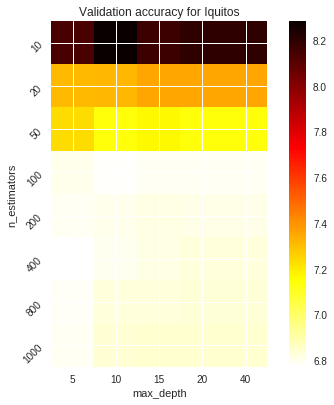

In [11]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores__mean_absulute_error_iq, interpolation='nearest', cmap=plt.cm.hot_r)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
plt.colorbar()
plt.yticks(np.arange(len(parameters1_Iquitos)), parameters1_Iquitos, rotation=45)
plt.xticks(np.arange(len(parameters2_Iquitos)), parameters2_Iquitos)
plt.title('Validation accuracy for Iquitos')
plt.show()

## 2.3 Final evaluation of models

In [12]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

#regressor_sj = ElasticNet(alpha=param1_sj,
#                          l1_ratio=param2_sj)
regressor_sj = RandomForestRegressor(n_estimators=param1_sj,
                                     max_depth=param2_sj,
                                     criterion='mae',
                                     warm_start = True,
                                     random_state=0,
                                     n_jobs=8)

regressor_iq = RandomForestRegressor(n_estimators=param1_iq,
                                     max_depth=param2_iq,
                                     criterion='mae',
                                     warm_start = True,
                                     random_state=0,
                                     n_jobs=8)

In [13]:
regressor_sj.fit(X_sj_train,y_sj_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=8, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [14]:
regressor_iq.fit(X_iq_train,y_iq_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=8, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

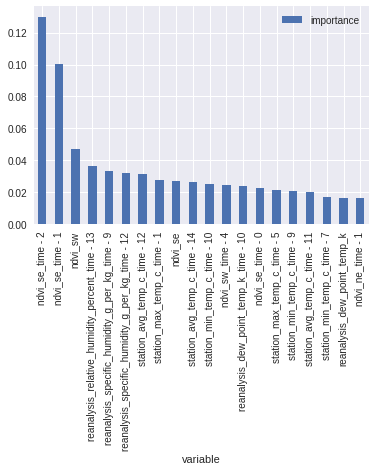

In [22]:
df_features_importance = pd.concat((pd.DataFrame(X_sj_train.columns, columns = ['variable']), 
           pd.DataFrame(regressor_sj.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

df_features_importance.plot.bar(x=df_features_importance['variable'])

In [15]:
predictions_sj = regressor_sj.predict(X_sj_test)
predictions_iq = regressor_iq.predict(X_iq_test)

For San Juan
 
mean_squared_error: 1125.9266093755891
mean_absolute_error: 25.047097704594794

For Iquitos
 
mean_squared_error: 110.57673673912622
mean_absolute_error: 6.770528604971014


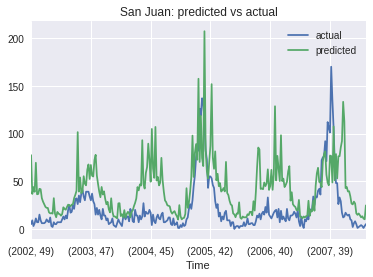

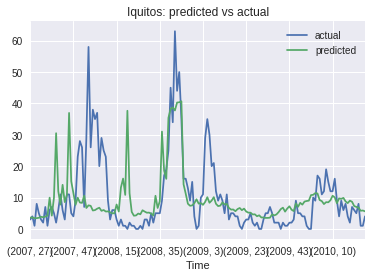

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("For San Juan\n ")
print("mean_squared_error: {0}".format(mean_squared_error(y_sj_test, predictions_sj)))
print("mean_absolute_error: {0}".format(mean_absolute_error(y_sj_test, predictions_sj)))
print("\nFor Iquitos\n ")
print("mean_squared_error: {0}".format(mean_squared_error(y_iq_test, predictions_iq)))
print("mean_absolute_error: {0}".format(mean_absolute_error(y_iq_test, predictions_iq)))

df1 = pd.DataFrame({"predicted":predictions_sj,"actual":y_sj_test})

df1.plot()
plt.title('San Juan: predicted vs actual')
plt.xlabel('Time')

df2 = pd.DataFrame({"predicted":predictions_iq,"actual":y_iq_test})

df2.plot()
plt.title('Iquitos: predicted vs actual')
plt.xlabel('Time')

plt.legend()

In [17]:
predictions_sj = regressor_sj.predict(sj_features)
predictions_iq = regressor_iq.predict(iq_features)

For San Juan
 
mean_squared_error: 798.2084925361874
mean_absolute_error: 19.298658837193745

For Iquitos
 
mean_squared_error: 50.47429156236753
mean_absolute_error: 4.576126582838847


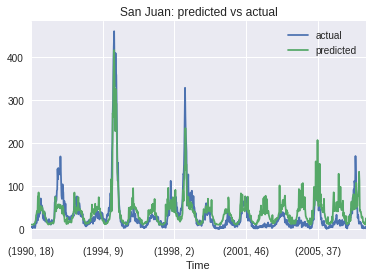

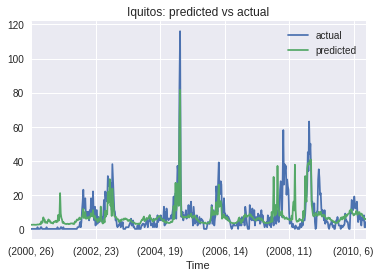

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("For San Juan\n ")
print("mean_squared_error: {0}".format(mean_squared_error(sj_targets, predictions_sj)))
print("mean_absolute_error: {0}".format(mean_absolute_error(sj_targets, predictions_sj)))
print("\nFor Iquitos\n ")
print("mean_squared_error: {0}".format(mean_squared_error(iq_targets, predictions_iq)))
print("mean_absolute_error: {0}".format(mean_absolute_error(iq_targets, predictions_iq)))

df1 = pd.DataFrame({"predicted":predictions_sj,"actual":sj_targets})

df1.plot()
plt.title('San Juan: predicted vs actual')
plt.xlabel('Time')

df2 = pd.DataFrame({"predicted":predictions_iq,"actual":iq_targets})

df2.plot()
plt.title('Iquitos: predicted vs actual')
plt.xlabel('Time')

plt.legend()

# 3. Submission

In [19]:
#regressor_sj.fit(sj_features,sj_targets)

In [20]:
#regressor_iq.fit(iq_features,iq_targets)

In [21]:
sj_test, iq_test = preprocess_data('dengue_features_test.csv',
                                   lag_step_for_SanJuan = lag_step_for_SanJuan,
                                   lag_step_for_Iquitos = lag_step_for_Iquitos)


sj_predictions = regressor_sj.predict(sj_test).astype(int)
iq_predictions = regressor_iq.predict(iq_test).astype(int)

submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate((sj_predictions, iq_predictions),axis=0)
submission.to_csv("SanJuan-RandomForest_Iquitos-RandomForest.csv")

/home/louis/Documents/Doctorat/OnlineDatasets/dengue-drivendata/data_processing.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe[column + "_time - " + str(lag)] = dataframe[column].shift(lag)  # copy the previous value
/home/louis/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [23]:
X_sj_train.shape

(655, 320)